In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Processed Property Data.csv')
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2006


In [3]:
df.drop('Address',axis=1,inplace=True)

In [4]:
df = df[df['Year_Sold']>2018]

In [5]:
df.drop(['Year_Sold','Date_Sold','Floorplan','Road_Name','Post_Code','New_Build'],axis=1,inplace=True)
df.head()

,Price,Tenure_Type,Property_Type,Num_Bedrooms,Latitude,Longitude
0,720050,Freehold,Terraced,3.0,51.57167,-0.01677
2,643756,Freehold,Terraced,4.0,51.57082,-0.01955
5,504000,Leasehold,Flat,2.0,51.56547,-0.00145
7,714000,Freehold,Terraced,3.0,51.56015,-0.01063
12,540000,Leasehold,Flat,3.0,51.56082,-0.00252


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 1579
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          618 non-null    int64  
 1   Tenure_Type    618 non-null    object 
 2   Property_Type  618 non-null    object 
 3   Num_Bedrooms   618 non-null    float64
 4   Latitude       618 non-null    float64
 5   Longitude      618 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 33.8+ KB


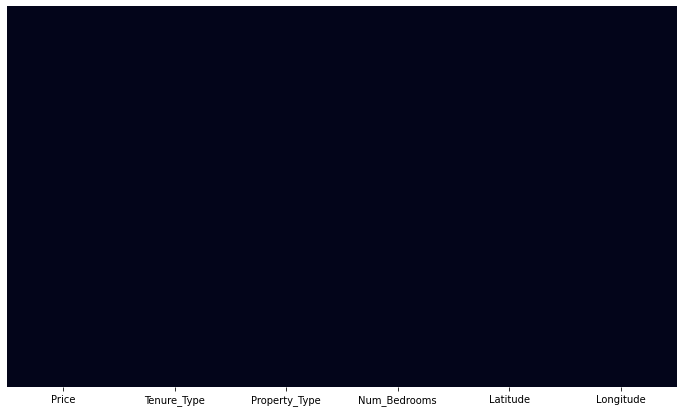

In [7]:
plt.figure(figsize=(12,7))
axis = sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

## Data Preprocessing

- Convert Datatypes (Categoric -> Numeric Data)

One hot encoding converting categorical features into encoded form of 0 and 1

In [8]:
df = pd.get_dummies(df, drop_first = True)
df.head()

,Price,Num_Bedrooms,Latitude,Longitude,Tenure_Type_Leasehold,Property_Type_Flat,Property_Type_Semi-Detached,Property_Type_Terraced
0,720050,3.0,51.57167,-0.01677,0,0,0,1
2,643756,4.0,51.57082,-0.01955,0,0,0,1
5,504000,2.0,51.56547,-0.00145,1,1,0,0
7,714000,3.0,51.56015,-0.01063,0,0,0,1
12,540000,3.0,51.56082,-0.00252,1,1,0,0


Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Price',axis=1).copy()
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

Creating and training the model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

Model Evaluation

In [14]:
print(lm.intercept_)

-50763552.02848794


In [15]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Num_Bedrooms,7.763437e+04
Latitude,9.940112e+05
Longitude,2.938081e+06
Tenure_Type_Leasehold,-6.733649e+04
Property_Type_Flat,-1.448016e+05
Property_Type_Semi-Detached,-1.223261e+05
Property_Type_Terraced,-1.140047e+05


In [16]:
coeff_df.loc['Num_Bedrooms']

Coefficient    77634.374893
Name: Num_Bedrooms, dtype: float64

Predictions from the Model

In [17]:
predictions = lm.predict(X_test)

<AxesSubplot:xlabel='Price'>

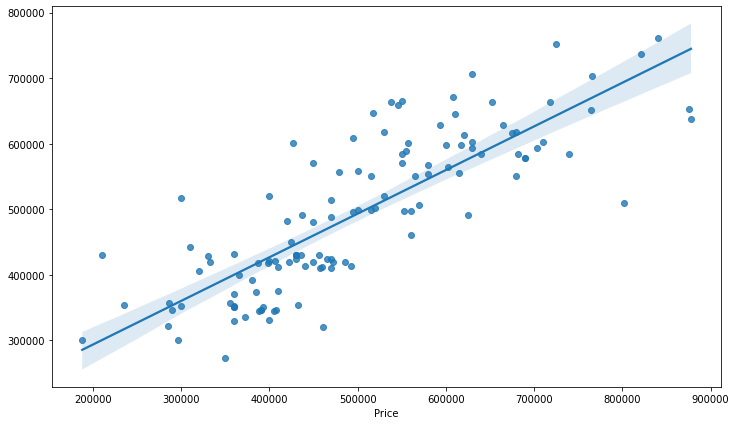

In [18]:
plt.figure(figsize=(12,7))
sns.regplot(x=y_test,y=predictions)

Regression Evaluation Metrics

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 61424.26164558884
MSE: 6690645568.055088
RMSE: 81796.36647220394


In [21]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          3.61e-107
Time:                        20:15:52   Log-Likelihood:                -6324.7
No. Observations:                 494   AIC:                         1.267e+04
Df Residuals:                     486   BIC:                         1.270e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Prediction for user's property

In [32]:
def input_user():
    num_bed = int(input('How many bedrooms does the property have? '))
    
    tenure = input('What type of tenure type does the property have? press L for leasehold and F for freehold')
    if tenure.lower() == 'l':
        tenure = 1
    else:
        tenure = 0

    prop = int(input('What is the type of the property? 1 for Flat, 2 for Terraced, 3 for Semi-Detached and 4 for Detached'))
    if prop == 1:
        num_list = [1,0,0,0]
    elif prop == 2:
        num_list = [0,1,0,0]
    elif prop == 3:
        num_list = [0,0,1,0]
    else:
        num_list = [0,0,0,1]

    return num_bed, tenure, num_list


In [35]:
x,y,z = input_user()

user_dict = {'Num_Bedrooms':x,'Latitude':51,'Longitude':-0.01677,'Tenure_Type_Leasehold':y,'Property_Type_Flat':z[0],'Property_Type_Semi-Detached':z[2],'Property_Type_Terraced':z[1]}

user_data = pd.DataFrame(user_dict, index=[0])

print(('Your property has a predicted cost of £{}'.format(round(lm.predict(user_data)[0]))))

Your property costs £37014
